In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from numpy.linalg import norm

import joblib
import glob
import sys
sys.path.insert(-1,'../Tools')
from data_parser_new import parse
from data_modification import calc_cost_patient, normalize_patient, trim_tat_patient, resample_patient
from data_analysis import plot_vcgs, calc_cost, calc_cost_wrong, calc_cost_rms, calc_cost_rms_norm

# Load in rVCG Files

In [2]:
pt = 'BiV1'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV1 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV1 = [np.nan]*len(vcg_files_BiV1)
rVCG_BiV1_names = [np.nan]*len(vcg_files_BiV1)

for i,file in enumerate(vcg_files_BiV1):
    rVCG_BiV1_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV1[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV1_zdict = dict(zip(rVCG_BiV1_names,range(len(vcg_files_BiV1))))

In [3]:
pt = 'BiV2'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV2 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV2 = [np.nan]*len(vcg_files_BiV2)
rVCG_BiV2_names = [np.nan]*len(vcg_files_BiV2)

for i,file in enumerate(vcg_files_BiV2):
    rVCG_BiV2_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV2[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV2_zdict = dict(zip(rVCG_BiV2_names,range(len(vcg_files_BiV2))))

In [4]:
pt = 'BiV3'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV3 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV3 = [np.nan]*len(vcg_files_BiV3)
rVCG_BiV3_names = [np.nan]*len(vcg_files_BiV3)

for i,file in enumerate(vcg_files_BiV3):
    rVCG_BiV3_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV3[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV3_zdict = dict(zip(rVCG_BiV3_names,range(len(vcg_files_BiV3))))

In [5]:
pt = 'BiV4'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV4 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV4 = [np.nan]*len(vcg_files_BiV4)
rVCG_BiV4_names = [np.nan]*len(vcg_files_BiV4)

for i,file in enumerate(vcg_files_BiV4):
    rVCG_BiV4_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV4[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV4_zdict = dict(zip(rVCG_BiV4_names,range(len(vcg_files_BiV4))))

In [6]:
pt = 'BiV5'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV5 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV5 = [np.nan]*len(vcg_files_BiV5)
rVCG_BiV5_names = [np.nan]*len(vcg_files_BiV5)

for i,file in enumerate(vcg_files_BiV5):
    rVCG_BiV5_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV5[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV5_zdict = dict(zip(rVCG_BiV5_names,range(len(vcg_files_BiV5))))

In [7]:
pt = 'BiV6'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV6 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV6 = [np.nan]*len(vcg_files_BiV6)
rVCG_BiV6_names = [np.nan]*len(vcg_files_BiV6)

for i,file in enumerate(vcg_files_BiV6):
    rVCG_BiV6_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV6[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV6_zdict = dict(zip(rVCG_BiV6_names,range(len(vcg_files_BiV6))))

In [8]:
pt = 'BiV7'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV7 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV7 = [np.nan]*len(vcg_files_BiV7)
rVCG_BiV7_names = [np.nan]*len(vcg_files_BiV7)

for i,file in enumerate(vcg_files_BiV7):
    rVCG_BiV7_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV7[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV7_zdict = dict(zip(rVCG_BiV7_names,range(len(vcg_files_BiV7))))

In [9]:
pt = 'BiV8'
vcg_dir = './rVCGs_percentile_norm/'
vcg_files_BiV8 = glob.glob(vcg_dir+'VCG_'+pt+'*.txt')

rVCG_BiV8 = [np.nan]*len(vcg_files_BiV8)
rVCG_BiV8_names = [np.nan]*len(vcg_files_BiV8)

for i,file in enumerate(vcg_files_BiV8):
    rVCG_BiV8_names[i] = file.rsplit('/',1)[1].split('_',2)[2].rsplit('_',1)[0].strip('.txt')
    rVCG_BiV8[i] = pd.read_csv(file, header=None, usecols=[2, 3, 4], names=['VCGx', 'VCGy', 'VCGz'], sep='\t', index_col=False)
    
BiV8_zdict = dict(zip(rVCG_BiV8_names,range(len(vcg_files_BiV8))))

# Visualize rVCGs

In [10]:
BiV_all_rVCG = [rVCG_BiV7,rVCG_BiV2]
BiV_all_zdict = [BiV7_zdict,BiV2_zdict] 

In [11]:
def update_plot(pt,m,p1,p2):
    patient_dict = {'BiV7 (no_scar)':0,'BiV2 (w/ scar)':1}
    pt_i = patient_dict[pt]
    zdict = BiV_all_zdict[pt_i]
    rVCG = BiV_all_rVCG[pt_i]
    
    pt_mean = rVCG[zdict['mean']]
    p1_str = 'm%i_p%i'%(m,p1)
    p2_str = 'm%i_p%i'%(m,p2)
    pt_p1 = rVCG[zdict[p1_str]]
    pt_p2 = rVCG[zdict[p2_str]]
    
    plot_vcgs(['Atlas Mean','pct = %i'%p1,'pct = %i'%p2],pt_mean,pt_p1,pt_p2)

In [12]:
widgets.interactive(update_plot,\
                pt=widgets.Dropdown(options=['BiV7 (no_scar)','BiV2 (w/ scar)'],description='Patient: ',disabled=False),\
                m = widgets.IntSlider(value=1, min=1, max=10, step=1,continuous_update=False,description='Mode = '),\
                p1 = widgets.IntSlider(value=5, min=5, max=95, step=15, description='Percentile = ',continuous_update=False),\
                p2 = widgets.IntSlider(value=95, min=5, max=95, step=15, description='Percentile = ',continuous_update=False)   )

interactive(children=(Dropdown(description='Patient: ', options=('BiV7 (no_scar)', 'BiV2 (w/ scar)'), value='B…

# Load VCG Atlas

In [25]:
#Load VCG atlas
atlas_file = '../Figure2/VCG_atlas_all.pickle'
pca = joblib.load(atlas_file)

weights_file = '../Figure2/VCG_atlas_all_weights.pickle'
X_weights = joblib.load(weights_file)

# Calculate Percentiles

In [26]:
eigvals = pca.singular_values_
components = np.array(pca.components_)
ncomp = components.shape[0]
nfeat = components.shape[1]

# BiV1
df_pscores_BiV1 = pd.DataFrame()
for mp_str in rVCG_BiV1_names:
    X = rVCG_BiV1[BiV1_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV1[mp_str] = pct_out

In [27]:
# BiV2
df_pscores_BiV2 = pd.DataFrame()
for mp_str in rVCG_BiV2_names:
    X = rVCG_BiV2[BiV2_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV2[mp_str] = pct_out

In [28]:
# BiV3
df_pscores_BiV3 = pd.DataFrame()
for mp_str in rVCG_BiV3_names:
    X = rVCG_BiV3[BiV3_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV3[mp_str] = pct_out

In [29]:
# BiV4
df_pscores_BiV4 = pd.DataFrame()
for mp_str in rVCG_BiV4_names:
    X = rVCG_BiV4[BiV4_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV4[mp_str] = pct_out

In [30]:
# BiV5
df_pscores_BiV5 = pd.DataFrame()
for mp_str in rVCG_BiV5_names:
    X = rVCG_BiV5[BiV5_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV5[mp_str] = pct_out

In [31]:
# BiV6
df_pscores_BiV6 = pd.DataFrame()
for mp_str in rVCG_BiV6_names:
    X = rVCG_BiV6[BiV6_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV6[mp_str] = pct_out

In [32]:
df_pscores_BiV7 = pd.DataFrame()
for mp_str in rVCG_BiV7_names:
    X = rVCG_BiV7[BiV7_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV7[mp_str] = pct_out

In [33]:
# BiV8
df_pscores_BiV8 = pd.DataFrame()
for mp_str in rVCG_BiV8_names:
    X = rVCG_BiV8[BiV8_zdict[mp_str]]
    X_new = pd.concat([X['VCGx'],X['VCGy'],X['VCGz']],axis=0,ignore_index=True).to_numpy()
    w = pca.transform(X_new.reshape(1,-1))
    pct_out = np.zeros(len(w[0]))
    for j in range(len(w[0])):
        pct_out[j] = stats.percentileofscore(X_weights[:,j], w[0][j])
        
    df_pscores_BiV8[mp_str] = pct_out

In [34]:
df_pscores = [df_pscores_BiV7, df_pscores_BiV2]

In [35]:
df_pscores_BiV2['m6_p50'].iloc[0:10]

0    52.183099
1    23.380282
2    26.478873
3    78.943662
4    21.690141
5     0.000000
6    69.084507
7    16.408451
8     0.000000
9    11.126761
Name: m6_p50, dtype: float64

# Plot rVCG Modes

In [36]:
sns.set()
n_modes = 10

def plot_rVCG_modes(p_scores):
    """Split a vectorized VCG with a single function call

    Arguments
    ---------
    Make mean black


    """
    
    fig_s, ax_s = plt.subplots(figsize = (8,5))
    
    x_vals = np.arange(1,n_modes+1)

    plt.scatter(x_vals, p_scores[0].iloc[0:n_modes])
    plt.scatter(x_vals, p_scores[1].iloc[0:n_modes])
    plt.scatter(x_vals, p_scores[2].iloc[0:n_modes])

    #ax_s.set_xlim([0.5, 20.5])
    ax_s.set_ylim([-2, 102])
    ax_s.set_xlabel('VCG Atlas Mode',fontsize=16)
    ax_s.set_ylabel('Percentile',fontsize=16)
    ax_s.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax_s.set_title('AT Atlas Reconstructed VCG Mode Scores',fontsize=16)

    plt.show()

In [37]:
def update_modes_plot(pt,m,p1,p2):
    patient_dict = {'BiV7 (no_scar)':0,'BiV2 (w/ scar)':1}
    pt_i = patient_dict[pt]
    zdict = BiV_all_zdict[pt_i]
    df = df_pscores[pt_i]
    
    p1_str = 'm%i_p%i'%(m,p1)
    p2_str = 'm%i_p%i'%(m,p2)
    
    zscores = [df['mean'], df[p1_str], df[p2_str]]
    
    plot_rVCG_modes(zscores)

In [38]:
widgets.interactive(update_modes_plot,\
                pt=widgets.Dropdown(options=['BiV7 (no_scar)','BiV2 (w/ scar)'],description='Patient: ',disabled=False),\
                m = widgets.IntSlider(value=1, min=1, max=10, step=1,continuous_update=False,description='Mode = '),\
                p1 = widgets.IntSlider(value=5, min=5, max=95, step=15, description='Percentile = ',continuous_update=False),\
                p2 = widgets.IntSlider(value=95, min=5, max=95, step=15, description='Percentile = ',continuous_update=False))

interactive(children=(Dropdown(description='Patient: ', options=('BiV7 (no_scar)', 'BiV2 (w/ scar)'), value='B…

# Calculate Sensitivity in terms of VCG atlas modes

$$(M_{rVCG95}-M_{rVCG5})/(rVCG_{AT95}-rVCG_{AT5})$$

# BiV1

In [39]:
jacob_BiV1 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV1[:,m-1] = (df_pscores_BiV1['m%i_p65'%m]-df_pscores_BiV1['m%i_p35'%m]).to_numpy()
    
jacob_BiV1 = jacob_BiV1/30

# BiV2

In [41]:
jacob_BiV2 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV2[:,m-1] = (df_pscores_BiV2['m%i_p65'%m]-df_pscores_BiV2['m%i_p35'%m]).to_numpy()
    
jacob_BiV2 = jacob_BiV2/30

# BiV3

In [43]:
jacob_BiV3 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV3[:,m-1] = (df_pscores_BiV3['m%i_p65'%m]-df_pscores_BiV3['m%i_p35'%m]).to_numpy()
    
jacob_BiV3 = jacob_BiV3/30

# BiV4

In [45]:
jacob_BiV4 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV4[:,m-1] = (df_pscores_BiV4['m%i_p65'%m]-df_pscores_BiV4['m%i_p35'%m]).to_numpy()
    
jacob_BiV4 = jacob_BiV4/30

# BiV5

In [47]:
jacob_BiV5 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV5[:,m-1] = (df_pscores_BiV5['m%i_p65'%m]-df_pscores_BiV5['m%i_p35'%m]).to_numpy()
    
jacob_BiV5 = jacob_BiV5/30

# BiV6

In [49]:
jacob_BiV6 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV6[:,m-1] = (df_pscores_BiV6['m%i_p65'%m]-df_pscores_BiV6['m%i_p35'%m]).to_numpy()
    
jacob_BiV6 = jacob_BiV6/30

# BiV7

In [51]:
jacob_BiV7 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV7[:,m-1] = (df_pscores_BiV7['m%i_p65'%m]-df_pscores_BiV7['m%i_p35'%m]).to_numpy()
    
jacob_BiV7 = jacob_BiV7/30

# BiV8

In [53]:
jacob_BiV8 = np.zeros([20,10])
for m in range(1,11):
    jacob_BiV8[:,m-1] = (df_pscores_BiV8['m%i_p65'%m]-df_pscores_BiV8['m%i_p35'%m]).to_numpy()
    
jacob_BiV8 = jacob_BiV8/30

# AVERAGE

In [55]:
jacob_mean = np.mean(np.absolute(np.dstack((jacob_BiV1[:10,:],jacob_BiV2[:10,:],
                     jacob_BiV3[:10,:],jacob_BiV4[:10,:],
                     jacob_BiV5[:10,:],jacob_BiV6[:10,:],
                     jacob_BiV7[:10,:],jacob_BiV8[:10,:]))), axis=2)

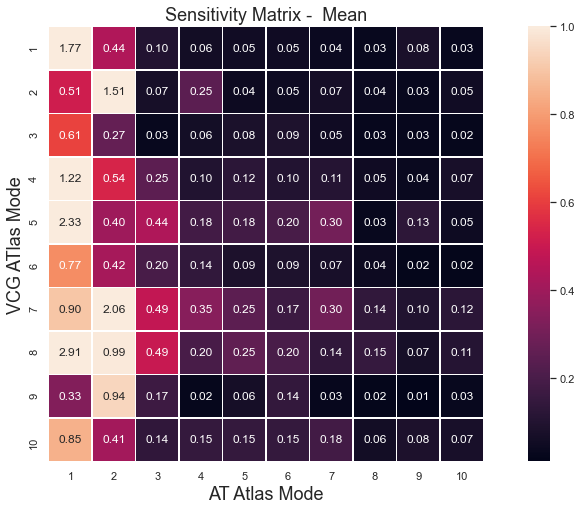

In [56]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = sns.heatmap(np.absolute(jacob_mean[:10,:]),annot=True, fmt='.2f', linewidths=.5, vmax=1.0, yticklabels=np.arange(10)+1, xticklabels=np.arange(10)+1,square=True)
ax.set_xlabel('AT Atlas Mode', fontsize=18)
ax.set_ylabel('VCG ATlas Mode', fontsize=18)
ax.set_title('Sensitivity Matrix -  Mean', fontsize=18)
#plt.show()
plt.savefig('Fig4D.pdf', transparent=True)

# STDEV

In [57]:
jacob_std = np.std(np.absolute(np.dstack((jacob_BiV1[:10,:],jacob_BiV2[:10,:],
                     jacob_BiV3[:10,:],jacob_BiV4[:10,:],
                     jacob_BiV5[:10,:],jacob_BiV6[:10,:],
                     jacob_BiV7[:10,:],jacob_BiV8[:10,:]))), axis=2)

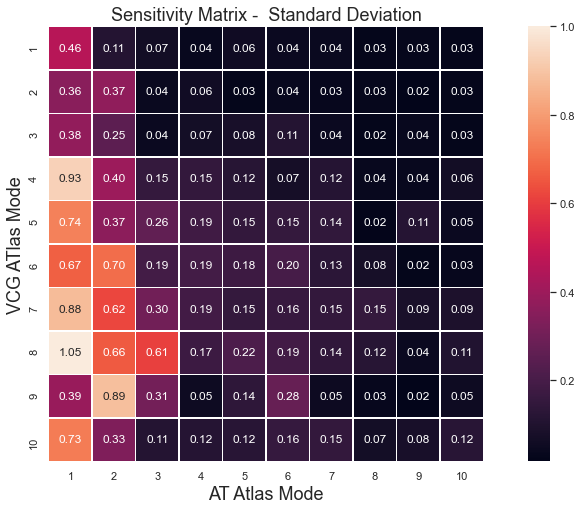

In [58]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = sns.heatmap(np.absolute(jacob_std[:10,:]),annot=True, fmt='.2f', linewidths=.5, vmax=1.0, yticklabels=np.arange(10)+1, xticklabels=np.arange(10)+1,square=True)
ax.set_xlabel('AT Atlas Mode', fontsize=18)
ax.set_ylabel('VCG ATlas Mode', fontsize=18)
ax.set_title('Sensitivity Matrix -  Standard Deviation', fontsize=18)
#plt.show()
plt.savefig('Fig4E.pdf', transparent=True)